# DATASET ONE

In [23]:
import pandas as pd
import seaborn as snb

In [2]:
data_mine = pd.read_csv("mine.csv")
data_mine

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [3]:
data_mine.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
data_mine.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [5]:
data_mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [6]:
#Checks which columns have null values
data_mine.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

# fillna fills null positions with wanted a value or values (using a dictionary)

In [7]:
#fillna(method="ffill") makes a null position to be filled be value in previous row and "bfill" does reverse
#axis attributes makes values be copped horizontally or vertically
#limit attribute limits copying in concurrent positions
new_df = data_mine.fillna(method ="ffill")
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [8]:
#checking if null values have been replaced by fillna
new_df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [9]:
#Creates middle missing values by getting means between next and previous value
new_def1 = data_mine.interpolate()
new_def1

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [10]:
#Drops any row with atleast one null
new_def2 = data_mine.dropna()
new_def2

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [11]:
#checking if dropna has removed all nulls in calories
new_def2.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

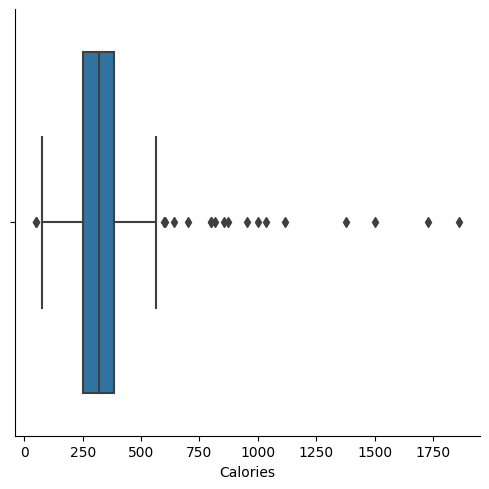

In [12]:
#Taking interpolated data to detect outliers
snb.catplot(x ="Calories",kind ="box",data =new_def1)

In [13]:
#Showing corelation
corelation = new_def1.corr()
corelation

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.921904
Pulse,-0.155408,1.000000,0.786535,0.028687
Maxpulse,0.009403,0.786535,1.000000,0.205759
Calories,0.921904,0.028687,0.205759,1.000000


<Axes: >

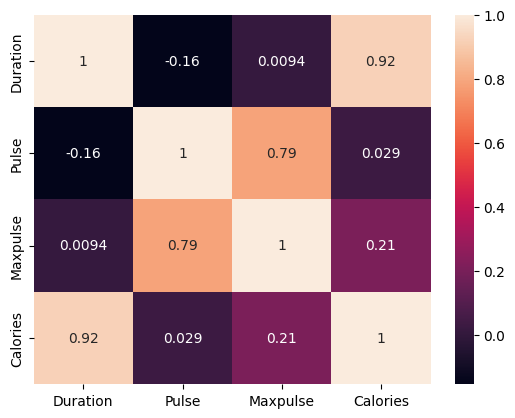

In [14]:
snb.heatmap(corelation,xticklabels = corelation.columns ,yticklabels = corelation.columns, annot = True)

<Axes: xlabel='Calories', ylabel='Count'>

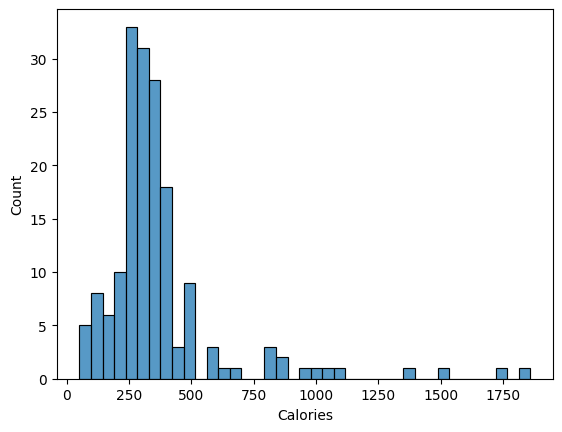

In [15]:
#Histogram
snb.histplot(new_def1["Calories"])

# DATASET TWO

In [16]:

data2 = pd.read_csv("Work.csv")
data2

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


In [17]:
data2.isnull().sum()

Name        0
city        0
age         1
py-score    1
dtype: int64

In [18]:
data3 = data2.fillna(method = "ffill")
data3

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,25,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,94
6,Jesca,Mbarara,21,84


In [19]:
data3.isnull().sum()

Name        0
city        0
age         0
py-score    0
dtype: int64

In [20]:
#removing non numeric rows
data4 =data3[pd.to_numeric(data3["age"],errors = 'coerce').notnull()]
data4 =data4[pd.to_numeric(data4["py-score"],errors = 'coerce').notnull()]
data4

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
3,Tevor,Livingstone,25,89
4,Yeko,Tororo,20,94
6,Jesca,Mbarara,21,84


In [21]:
#Removing unwanted columns
data4= data4.drop(["city","Name"],axis = 1)
data4

,age,py-score
0,23,90
1,26,75
3,25,89
4,20,94
6,21,84


In [22]:
#creating a corelation
corelation2 = data4.corr()
corelation2


,age,py-score
age,1.000000,-0.631274
py-score,-0.631274,1.000000
